In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:25pt;}
div.text_cell_render.rendered_html{font-size:18pt;}
div.output {font-size:24pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:21pt;padding:5px;}
table.dataframe{font-size:24px;}
</style>
"""))

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina' 
# 한글설정
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지
# plt.rc('font', family='AppleGothic') # Mac
# plt.rcParams['font.family'] = 'Malgun Gothic'

# warning(경고) 안보이게



<b><font color="red" size="6">ch12. 데이터 시각화</font></b>
- 시각화 라이브러리 : matplotlib, seaborn(데이터시각화), folium(지도시각화)
 * matplotlib : 파이썬에서 가장 쉽게 많이 사용하는 시각화 라이브러리. 판다스 내부에 포함
 * seaborn : matplotlib기반으로 다양한 색, 테마, 챠트 기능과 groupby 기능 포함된 라이브러리
 
# 2절 seaborn       
    - 공식사이트 : https://seaborn.pydata.org 
    - seaborn API : https://seaborn.pydata.org/api.html 

- seaborn으로 그래프 그리기 위해 다음 단계 따릅니다
    1. 데이터 준비
    2. 미적 속성 설정(한글설정을 다시)
    3. 함수를 이용해서 그래프 그리기(수치형, 범주형, 쌍관계, 밀도, 회귀, 다중그래프)
    4. 그래프 출력(show), 저장(savefig)

## 2.1 데이터 준비하기
- iris, titanic

In [3]:
iris = sns.load_dataset('iris')
iris.shape

(150, 5)

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
iris.species.unique() # 범주형 데이터들의 종류

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [11]:
iris['species'].value_counts() # 범주별 데이터 갯수

species
setosa        50
versicolor    50
virginica     50
Name: sepal_length, dtype: int64

In [4]:
titanic = sns.load_dataset('titanic')
# Survived - 생존유무, target 값. (0 = 사망, 1 = 생존)
# Name - 탑승객 성명
# Pclass - 티켓 클래스. (1 = 1st, 2 = 2nd, 3 = 3rd)
# Sex - 성별
# Age - 나이(세)
# SibSp - 함께 탑승한 형제자매, 배우자 수 총합
# Parch - 함께 탑승한 부모, 자녀 수 총합
# Embarked - 탑승 항구
# Fare - 탑승 요금
# Ticket - 티켓 넘버
# Cabin - 객실 넘버
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [13]:
titanic.shape

(891, 15)

In [14]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [15]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## 2.2 미적속성 설정하기(style, context, palette, figsize..)
### 1) 그래프 style 설정
- https://seaborn.pydata.org/generated/seaborn.axes_style.html#seaborn.axes_style (교안 51page)
- 범례사용 : https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot (교안20page)

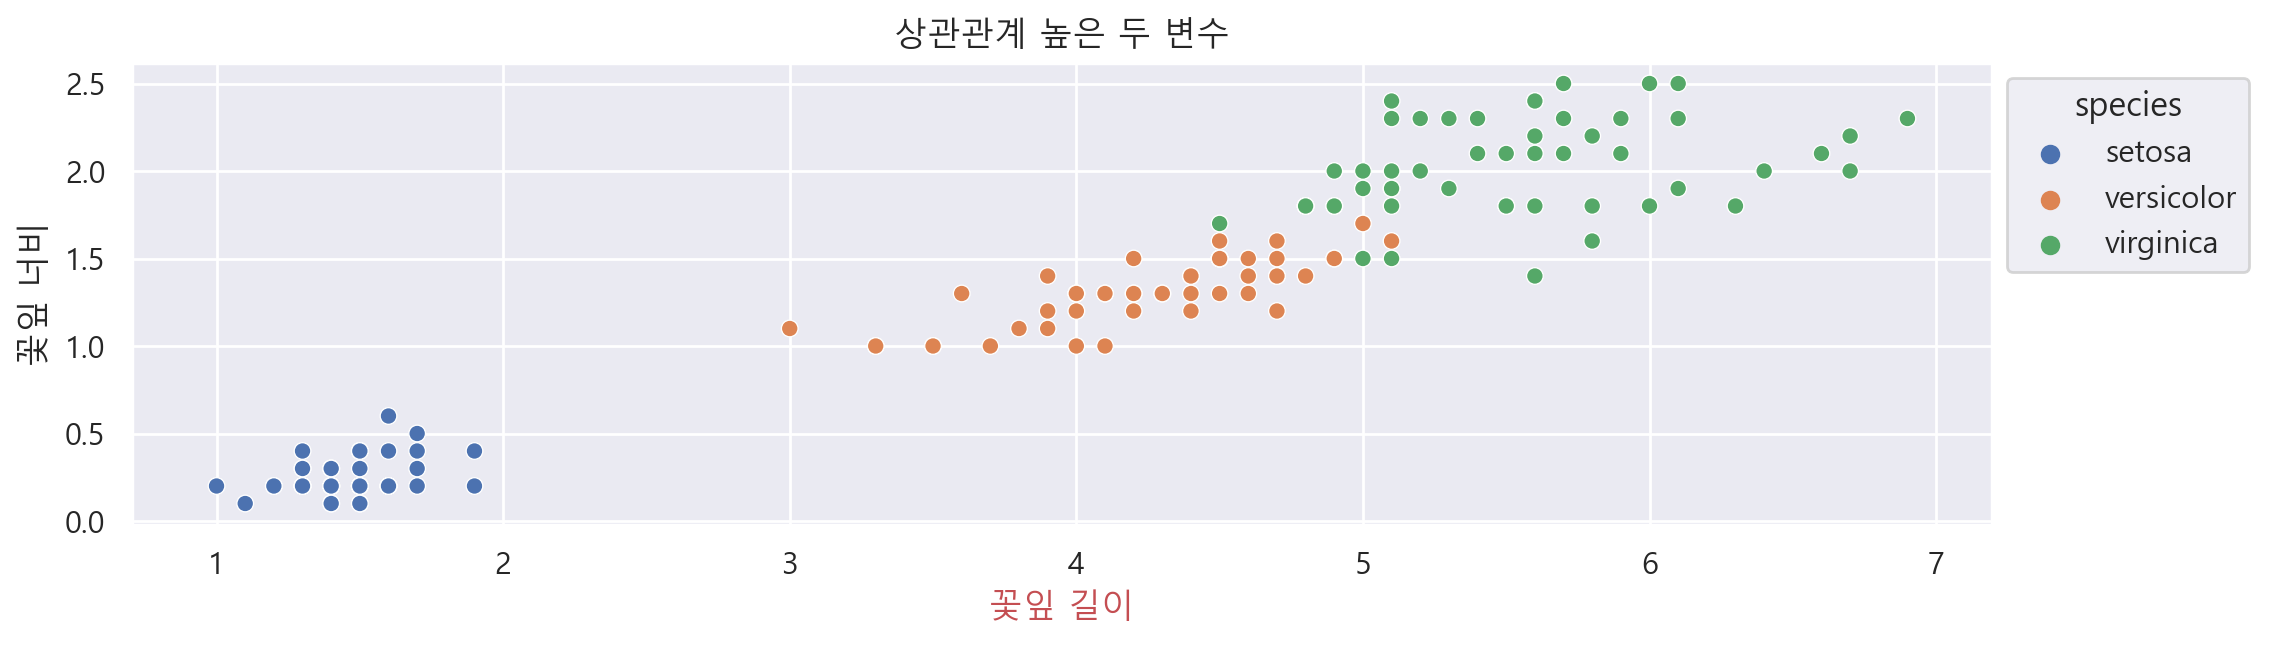

In [5]:
plt.figure(figsize=(12,3))
sns.set(style='darkgrid') # white, whitegrid, dark, darkgrid, ticks
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지

ax = sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set(title='상관관계 높은 두 변수',
       ylabel='꽃잎 너비')
ax.set_xlabel('꽃잎 길이', color='r')
plt.show()

### 2) 컨텍스트 지정(비율)

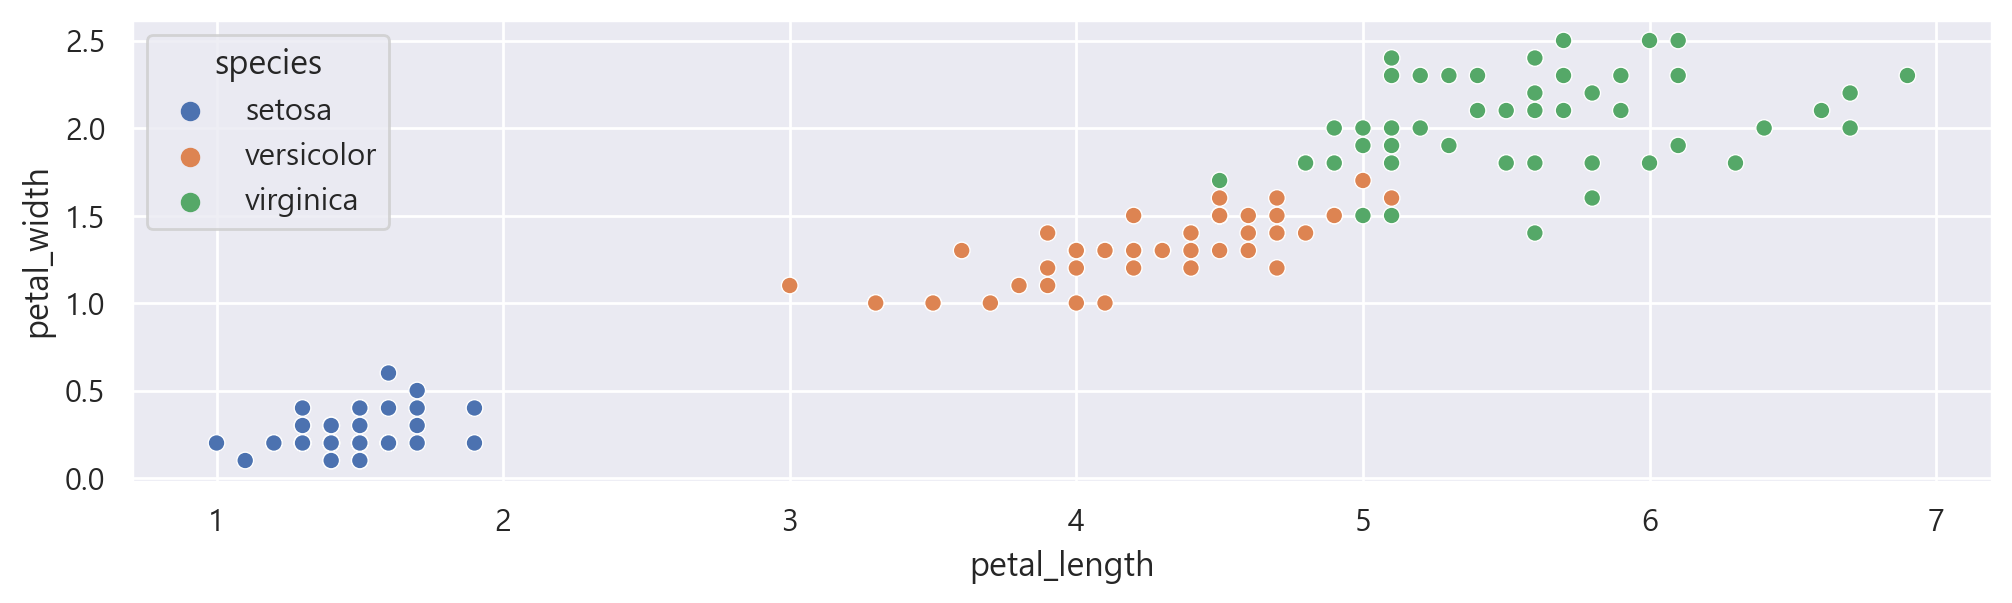

In [6]:
plt.figure(figsize=(12,3))
# sns.set(context='notebook') # notebook(1.0), paper(0.8), talk(1.3), poster(1.8)
sns.set_context('notebook')
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지

sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species')
plt.show()

### 3) 컬러 팔레트

- https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette
- https://matplotlib.org/tutorials/colors/colormaps.html
- https://seaborn.pydata.org/tutorial/color_palettes.html 

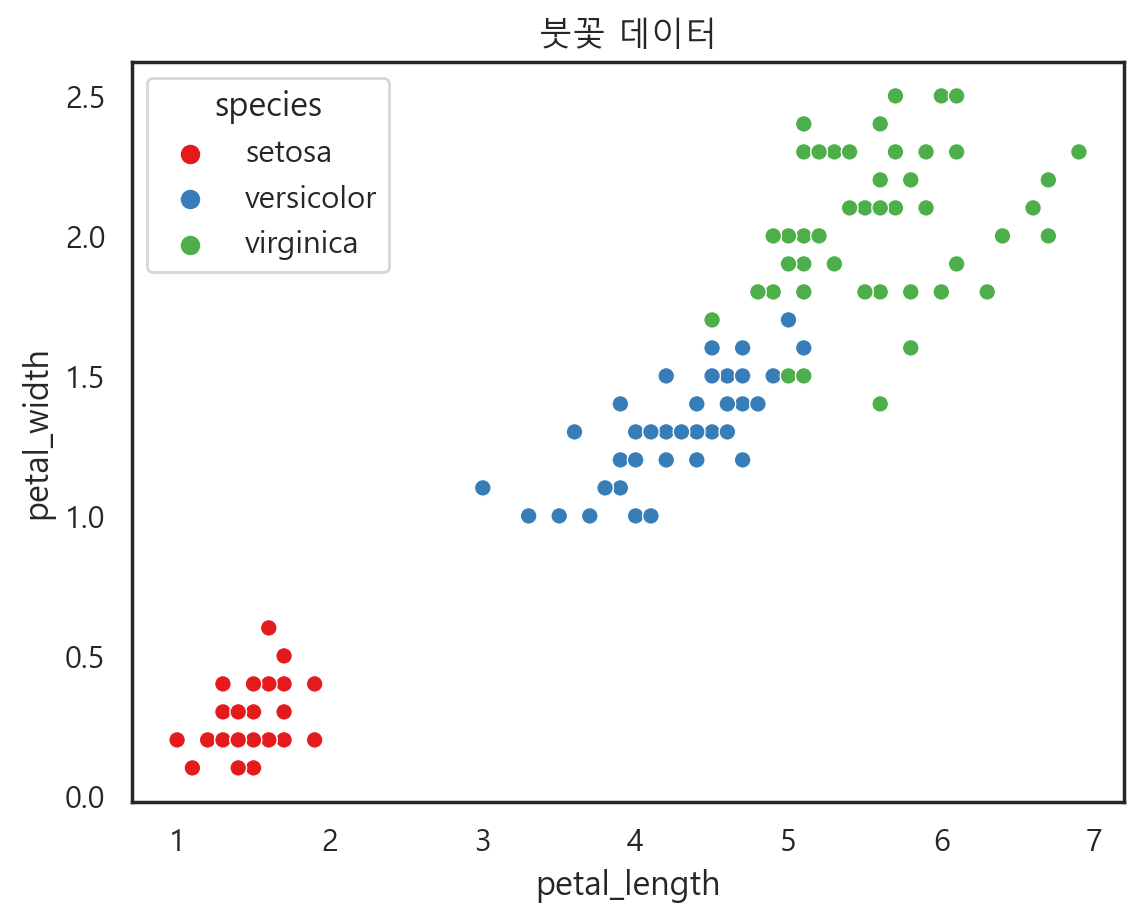

In [10]:
sns.set(palette='Pastel1', style='white', context='notebook') # 기본 미적 속성설정
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지
ax = sns.scatterplot(data=iris, x='petal_length', y='petal_width',
               hue='species', palette='Set1')
ax.set_title('붓꽃 데이터')
plt.show()

In [11]:
sns.set(palette='Dark2', 
        style='whitegrid', 
        context='notebook',
        rc={'figure.figsize':(10,3)}) # 기본 미적 속성설정
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지

## 2.3 Seaborn 함수로 그래프 그리기
### 1)관계형 그래프
    - x축이 수치형 데이터
  (ex) scatterplot, lineplot => relplot(서브플롯) 

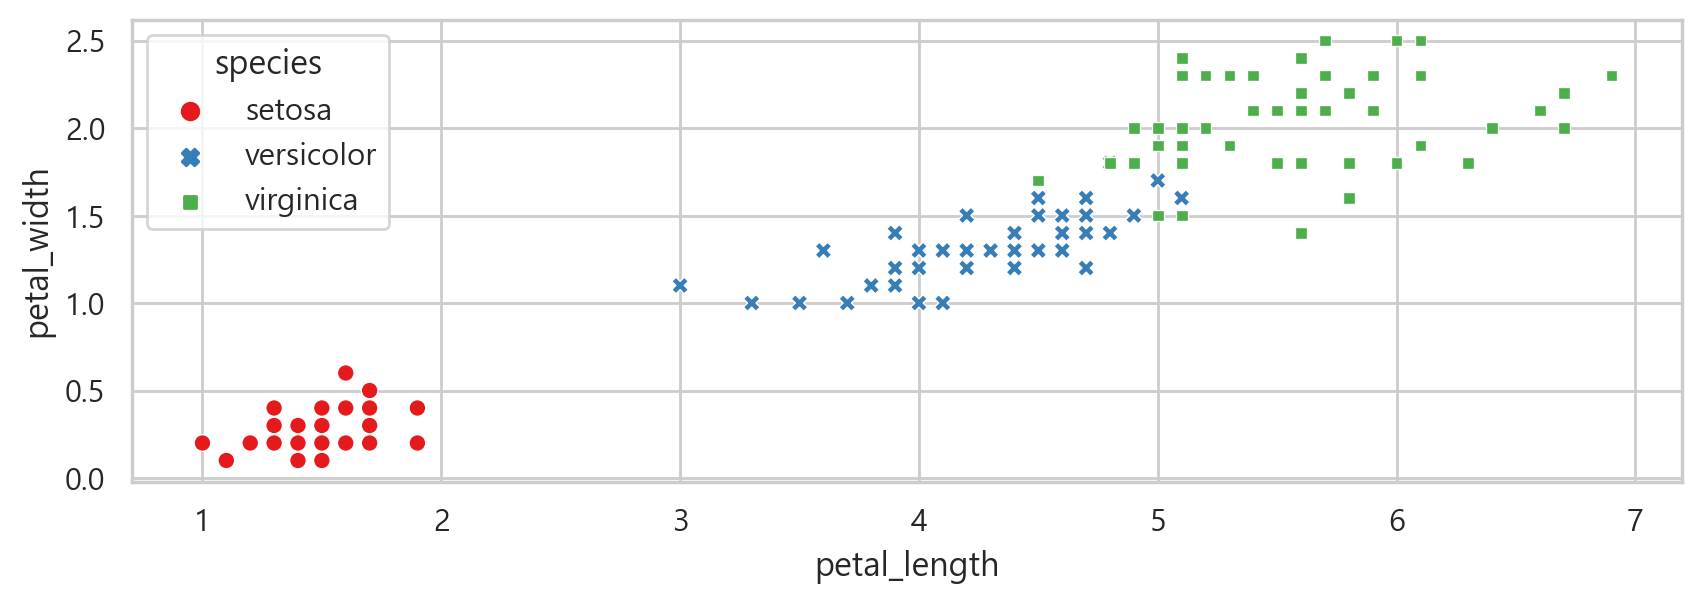

In [15]:
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species',
               palette='Set1', style='species')
        # species별 색상과 스타일이 다른 scatterplot
plt.show()

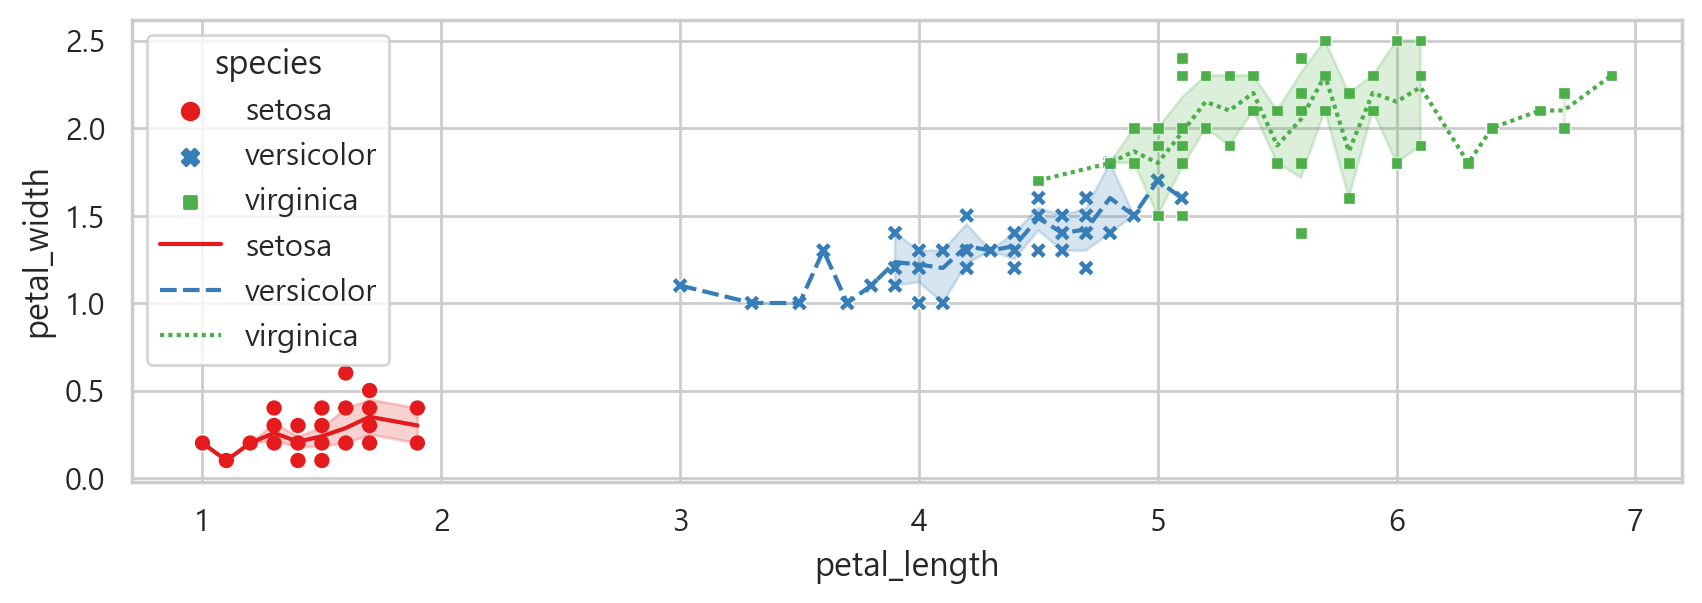

In [32]:
# 종별 lineplot 
# lineplot의 음영 : 95%신뢰구간
sns.lineplot(data=iris, x='petal_length', y='petal_width',
            hue='species', palette='Set1', style='species')
plt.show()

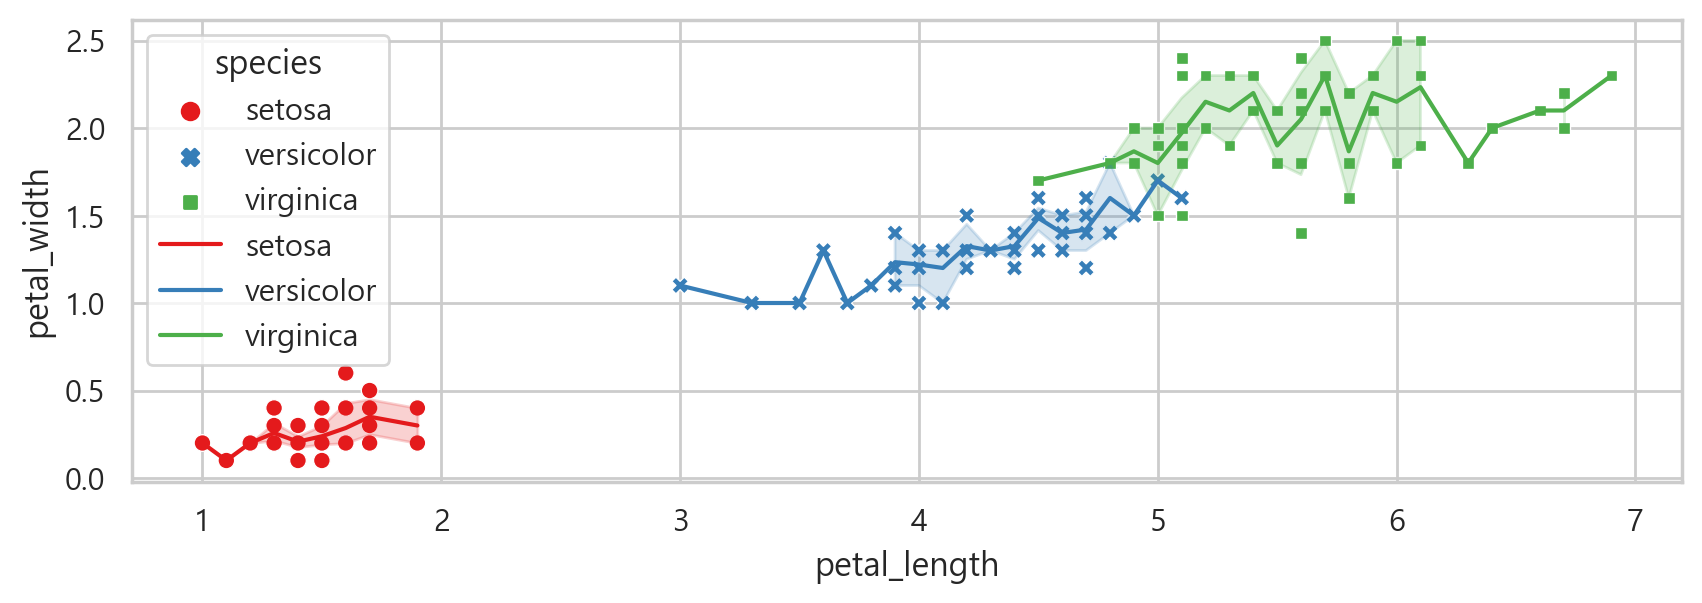

In [34]:
# scatter와 line을 겹쳐서
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species',
               palette='Set1', style='species')
        # species별 색상과 스타일이 다른 scatterplot
sns.lineplot(data=iris, x='petal_length', y='petal_width',
            hue='species', palette='Set1')
plt.show()

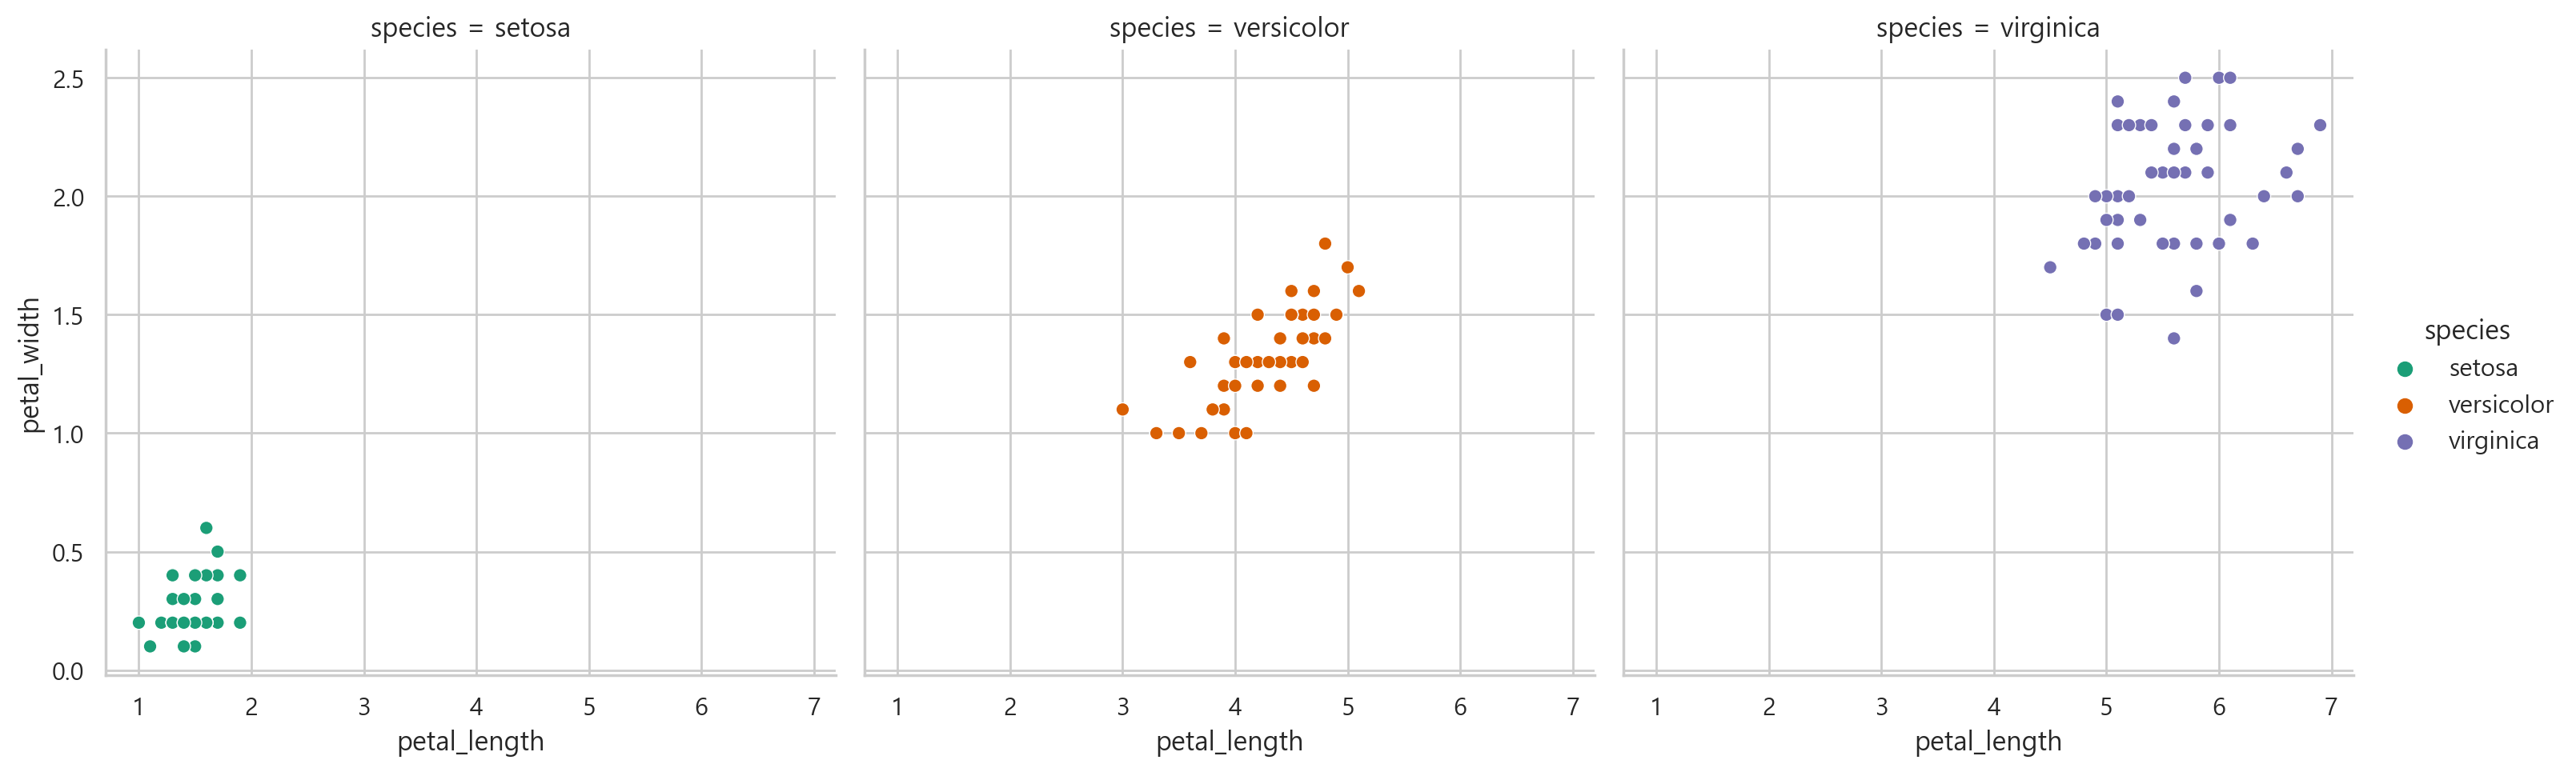

In [29]:
# 종별 lineplot을 서브플롯으로
sns.relplot(data=iris, x='petal_length', y='petal_width',
           hue='species',
           # kind='line', # kind='scatter'가 기본값
           col='species', # species별 서브플롯
           #col_wrap=2,    # 한줄에 표현될 서브플롯 수
           )
plt.show()

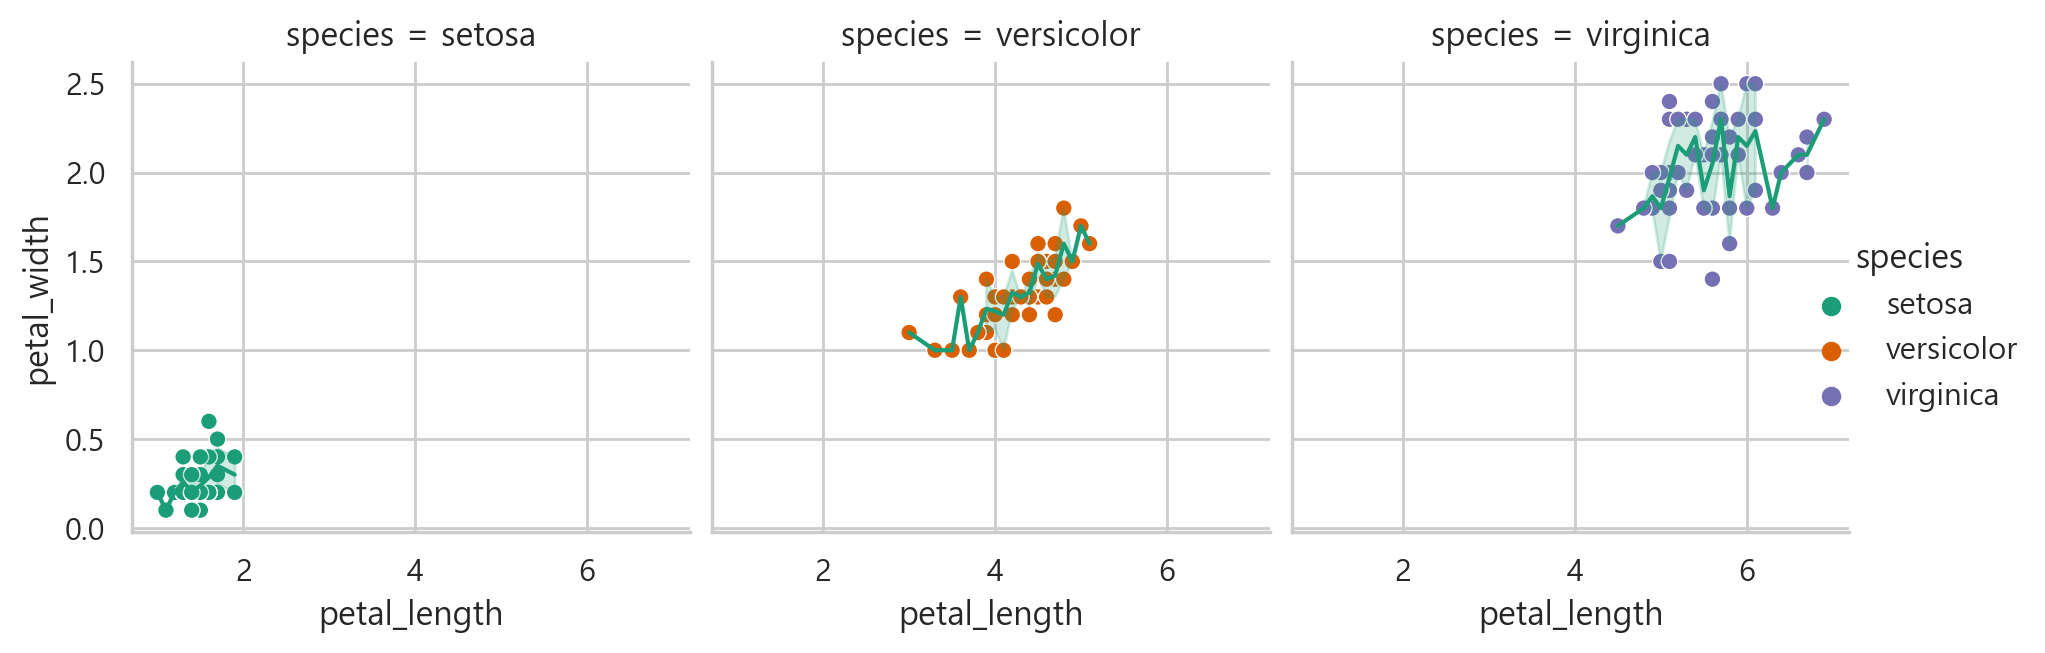

In [31]:
# line과 scatter를 종별 서브플롯으로 겹쳐서 
g = sns.relplot(data=iris, x='petal_length', y='petal_width',
           hue='species',
           # kind='line', # kind='scatter'가 기본값
           col='species', # species별 서브플롯
           #col_wrap=2,    # 한줄에 표현될 서브플롯 수
           )
# g그래프에 line플롯을 추가
g.map_dataframe(sns.lineplot, x='petal_length', y='petal_width')
# 크기 조정 : 서브플롯함수에서는 내부적으로 figure 새로 만들기 때문에 figsize 무시
g.fig.set_size_inches(10,3)

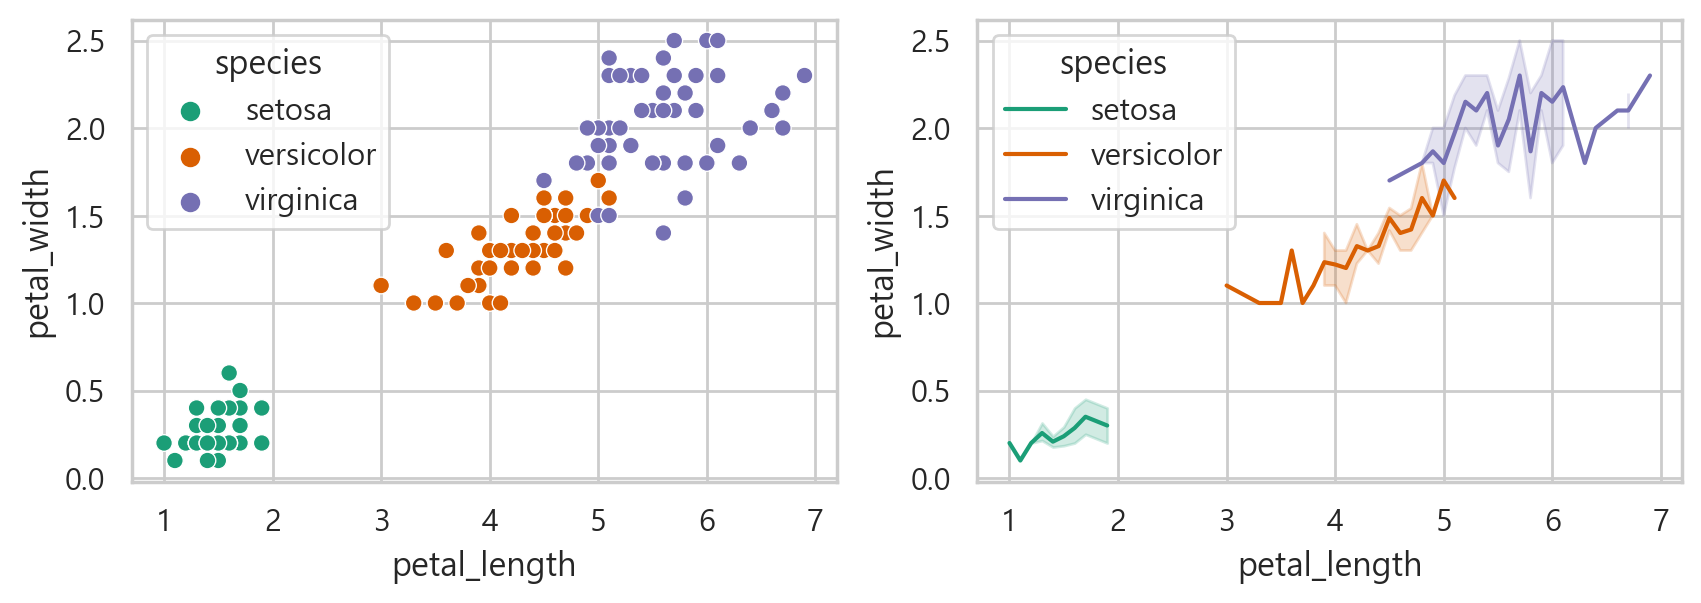

In [36]:
# ax[0]에는 scatter, ax[1] lineplot
fig, ax = plt.subplots(1, ncols=2)
sns.scatterplot(data=iris, 
                x='petal_length', 
                y='petal_width', 
                hue='species', 
                ax=ax[0])
sns.lineplot(data=iris, 
            x='petal_length', 
            y='petal_width', 
            hue='species',
            ax=ax[1])
plt.show()